 # Homework 1
 
 This homework will explore some basic techniques presented in the first two weeks of the course.
 
 You will be invited to experiment with:
 
 1. Co-occurrences
 2. Naive Bayes classifier
 
 
 Fill in the blanks with your own code and see how it works.
 
 # 1. Co-occurrences

In [1]:
import nltk
from nltk.corpus import brown

### Vocabulary

Get the list of words of documents in the category `news`.

In [2]:
nltk.download('brown')
brown_news = brown.words(categories='news')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\alexp\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


Extract the vocabulary and assign an index to each word.

In [3]:
# this should be a set
news_vocab = set(brown_news)

# this should be a dictionary that assigns an index to each word
news_word_ids = {word: id for id, word in enumerate(news_vocab)}

## 1.1 Compute co-occurrence Matrix
Constructs a co-occurrence matrix for a certain window-size $n$ (with a default of
4), considering words $n$ before and $n$ after the word in the center of the window.

In [4]:
import numpy as np

def co_occurrence_matrix(words, word_ids, n=4):
    """
    :param words: a list of words
    :param word_ids: dictionary word -> id
    :param n: size of context
    :return: the matrix of cooccurrences
    """
    # your code here
    # initialize matrix
    voc_size = len(word_ids.keys())
    M = np.zeros(shape=(voc_size, voc_size), dtype=int)

    # scan list of words and fill the matrix
    for i, centr_w in enumerate(words):
        # create context for the current word
        context = words[max(0, i-n) : min(len(words), i+n)]
        context.remove(centr_w)
        # for each word in context, increment the correct cells in M
        for contxt_w in context:
            M[word_ids[centr_w]][word_ids[contxt_w]] += 1

    return M

In [5]:
M = co_occurrence_matrix(brown_news, news_word_ids, 5)

### Explore co-occurrences

In [6]:
def show_cooccurrences(word_list, word_ids, M):
    """
    :param word_list: the list of words whose co-occurrences to show
    :param word_ids: dictionary assigning ID's to words
    :param M: the co-occurrence matrix
    """
    # print the top 10 most co-occurring words for each word in word_list
    for curr_w in word_list:
        if curr_w in word_ids:
            co_occs = [(w, M[word_ids[curr_w]][word_ids[w]]) for w in word_ids]
            co_occs.sort(key=(lambda couple: couple[1]), reverse=True)  # descending order by number of cooccurrences
            print("{:15s}\n{}\n".format(f"\"{curr_w}\":", co_occs[: 10]))
        else:
            print(f"\"{curr_w}\": not present in vocabulary\n")

In [7]:
word_list = ['python', 'snake', 'language', 'cobra', 'food', 'bread', 'wine', 'beer',
             'barrels', 'oil', 'energy', 'kuwait', 'revenues', 'profits']

In [8]:
show_cooccurrences(word_list, news_word_ids, M)

"python": not present in vocabulary

"snake":       
[('and', 2), ('restaurants', 1), ('souvenir', 1), ('are', 1), ('farms', 1), ('stands', 1), (',', 1), ('braced', 1), ('Act', 0), ('Simpson', 0)]

"language":    
[(',', 3), (';', 2), ('you', 2), ('and', 1), ('And', 1), ('week', 1), ('.', 1), ('history', 1), ('pure', 1), ('science', 1)]

"cobra": not present in vocabulary

"food":        
[(',', 11), ('.', 6), ('the', 5), ('a', 4), ('and', 3), ('of', 3), ('``', 3), ("''", 2), ('to', 2), ("SMU's", 2)]

"bread":       
[('and', 1), ('ring', 1), ('rich', 1), ('coconut', 1), ('a', 1), (',', 1), ('filling', 1), ('with', 1), ('yeast', 1), ('Act', 0)]

"wine": not present in vocabulary

"beer":        
[('a', 2), ('clubs', 1), ('the', 1), ('and', 1), ('to', 1), ('wash', 1), ('that', 1), ('run', 1), ('drop', 1), ('of', 1)]

"barrels": not present in vocabulary

"oil":         
[('and', 5), ('.', 3), (',', 3), ('the', 2), ('?', 2), ('by', 2), ('mill', 2), ('The', 2), ('supplies', 2), ('Check', 

### Do the same for category ‘hobbies’.

In [9]:
brown_hobbies = brown.words(categories='hobbies')
hobbies_vocab = set(brown_hobbies)
hobbies_word_ids = {word: id for id, word in enumerate(hobbies_vocab)}
M_hobbies = co_occurrence_matrix(brown_hobbies, hobbies_word_ids, 5)

show_cooccurrences(word_list, hobbies_word_ids, M_hobbies)

"python": not present in vocabulary

"snake": not present in vocabulary

"language": not present in vocabulary

"cobra": not present in vocabulary

"food":        
[('and', 6), (',', 6), ('that', 3), ('of', 3), ('the', 2), ('to', 2), ('those', 2), ('.', 2), ('supplements', 2), ('good', 2)]

"bread":       
[(',', 5), ('a', 2), ('salad', 2), ('and', 1), ('meat', 1), ('preparing', 1), ('drink', 1), ('garlic', 1), ('with', 1), ('or', 1)]

"wine":        
[('the', 1), ('and', 1), ('one', 1), ('white', 1), (':', 1), ('beating', 1), ('solvency', 1), ('this', 1), ('of', 1), ('took', 1)]

"beer":        
[('and', 2), ('for', 2), ('or', 2), ('chilled', 1), ('that', 1), ('soup', 1), ('keep', 1), ('soft', 1), ('earthenware', 1), (',', 1)]

"barrels":     
[('to', 2), ('the', 1), ('shot', 1), ('so', 1), ('how', 1), ('out', 1), ('that', 1), ('before', 1), ('standard-weight', 1), ('they', 1)]

"oil":         
[('the', 19), ('.', 11), (',', 10), ('and', 9), ('a', 9), ('for', 9), ('in', 8), ('of', 6),

## 1.2 Visualize the Vectors
Projects vectors into two dimensions and use it to plot the rows of the sliced matrix, using the technique of Principal
Component Analysis,

In [10]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def visualize_vectors(words, word_vectors):
    """
    Plot a 2 dimensional visualization of word vectors.
    :param words: the words to visualize
    :param word_vectors: the vectors for those words
    """
    vector_twodim = PCA().fit_transform(word_vectors)[:,:2]
    # show the numerical values of reduced vectors
    for w,v in zip(words, vector_twodim):
        print(w, v)

    plt.figure(figsize=(8,8))
    plt.scatter(vector_twodim[:,0], vector_twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, vector_twodim):
        plt.text(x+0.05, y+0.05, word)

Extract the co-occurrence vectors for a given list of words

In [11]:
def cooccurrence_vectors(word_list, word_ids, M):
    """
    :param word_list: a list of words
    :param word_ids: dictionary of word IDs
    :param M: co-occurrence matrix
    :return: tow results: the vectors for the given words as well as word_list 
    """
    vectors = []
    words = []
    for w in word_list:
        if w in word_ids:
            vectors.append(M[word_ids[w]])
            words.append(w)
    return vectors, words

Visualize the co-occurrence vectors for the given words:

snake [-4.36920589 -0.10698713]
language [-3.32216371  1.01431078]
food [9.6196188  9.64554924]
bread [-4.27543525 -0.02696521]
beer [-3.18900771 -0.99584496]
oil [-0.34037568  1.36978056]
energy [-4.16917771 -1.13327629]
revenues [12.59998232 -8.07563925]
profits [-2.55423517 -1.69092774]


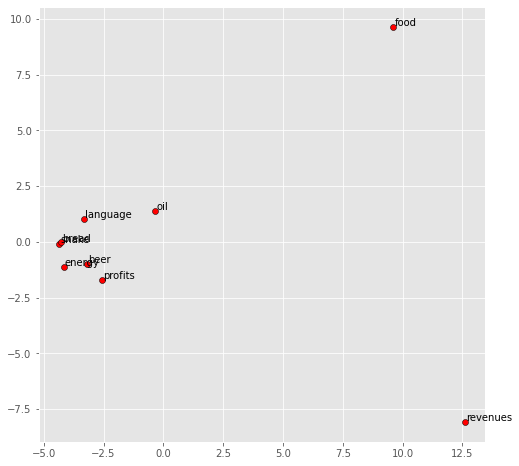

In [12]:
word_vectors, words = cooccurrence_vectors(word_list, news_word_ids, M)
visualize_vectors(words, word_vectors)

food [4.29263037e-03 9.05356981e+00]
bread [-4.40014324  0.1524532 ]
wine [-5.33773907 -1.77722975]
beer [-5.1338294  -0.69114515]
barrels [-5.75670557 -1.67735643]
oil [27.59708112 -1.27392985]
energy [-1.3827553  -1.91766789]
profits [-5.59020118 -1.86869394]


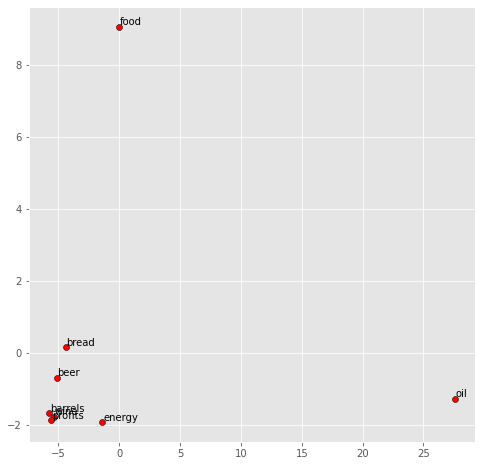

In [13]:
word_vectors, words = cooccurrence_vectors(word_list, hobbies_word_ids, M_hobbies)
visualize_vectors(words, word_vectors)

# 2 Naïve Bayes Classifier
We will use the Movie Review dataset from https://www.kaggle.com/pankrzysiu/keras-imdb
It contains 50,000 highly polarized reviews, preprocessed, tokenized, indexed and stored into
numpy arrays.

In [14]:
num_words = 10000
MAX_NUM_WORDS = 10000

import tensorflow as tf
from tensorflow.keras.datasets import imdb

Load the training and test set:

In [15]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_NUM_WORDS, index_from=1)

17465344/17464789 [==============================] - 6s 0us/step

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
d:\projects\hlt-assignments\venv\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
d:\projects\hlt-assignments\venv\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

Each document is represented as a list of word IDs, while the output is {0,1} (negative or positive review)

In [16]:
x_train[1], y_train[1]

([1,
  192,
  1151,
  192,
  8253,
  76,
  226,
  3,
  4,
  1461,
  4367,
  5010,
  132,
  24,
  2,
  713,
  6,
  116,
  1632,
  12,
  392,
  18,
  11,
  117,
  952,
  187,
  100,
  3,
  205,
  108,
  3101,
  19,
  12,
  67,
  186,
  6,
  28,
  21,
  5,
  2,
  247,
  124,
  91,
  2,
  112,
  7,
  2298,
  1521,
  3,
  645,
  2,
  114,
  7,
  33,
  8161,
  2,
  227,
  7,
  338,
  1320,
  2,
  116,
  7,
  2,
  128,
  4899,
  17,
  2,
  1000,
  3,
  87,
  27,
  950,
  44,
  35,
  2,
  453,
  7,
  43,
  41,
  36,
  1541,
  1903,
  396,
  2,
  1647,
  24,
  6851,
  3,
  161,
  9,
  3213,
  2,
  2,
  1151,
  7,
  192,
  773,
  5,
  8253,
  2,
  347,
  2635,
  146,
  603,
  2,
  8001,
  13,
  121,
  123,
  66,
  2,
  6851,
  13,
  347,
  163,
  4360,
  96,
  3,
  2,
  226,
  7,
  41,
  2,
  1155,
  13,
  297,
  118,
  3,
  118,
  172,
  9,
  218,
  173,
  134,
  48,
  7,
  4371,
  226,
  8253,
  3,
  2,
  654,
  243,
  2348,
  3,
  2,
  9835,
  129,
  150,
  489,
  16,
  2,
  30,
  7462,
  121

## 2.1 Classifier

The classifier should be impelemted as a class with two methods: `train()` and `predict()`.

In [16]:
import numpy as np
from collections import defaultdict
from collections import Counter

class NBayesClassifier():
    
    def train(self, x_train, y_train):
        """
        :param x_train: an array of list of word IDs
        :param y_train: {0,1} category for the correspoding document
        """
        # compute priors for each category
        counts = Counter()
        for c in y_train:
            counts[c] += 1
        classes = list(counts.keys())
        values = list(counts.values())
        self.P_C = dict(zip(classes, np.divide(values, len(y_train))))

        # compute the conditional probabilities for each word/category pair
        self.logprob = np.zeros(shape=(len(classes), num_words))
        n_words_per_class = np.zeros(shape=len(classes))
        vocab = set()
        for doc, cl in zip(x_train, y_train):
            for w in doc:
                vocab.add(w)
                self.logprob[cl][w] += 1
                n_words_per_class[cl] += 1

        # turn counts into logprob
        alpha = 1
        for cl in classes:
            self.logprob[cl] = np.divide(self.logprob[cl] + alpha, n_words_per_class[cl] + alpha * len(vocab))
            self.logprob[cl] = np.log(self.logprob[cl])
            self.P_C[cl] = np.log(self.P_C[cl])

    def predict(self, x_test):
        """
        :param x_test: a list of word IDs
        :return: the predicted class for :param x_test:.
        """
        y_pred = np.zeros(shape=len(x_test))
        for i, doc in enumerate(x_test):
            probs = {cl: self.P_C[cl] + np.sum(self.logprob[cl][w] for w in doc) for cl in self.P_C}
            max_prob = -np.inf
            for k, v in probs.items():
                if v > max_prob:
                    max_prob = v
                    y_pred[i] = k   # assigned at least once because max_prob init at -inf

        return y_pred

In [17]:
nb_classifier = NBayesClassifier()
nb_classifier.train(x_train, y_train)

## 2.2 Evaluation

In [18]:
def evaluate(y_test, y_pred):
    # compute tp, fp, tn, fn
    n_correct = 0.
    tp = 0.
    fp = 0.
    fn = 0.
    for tru, pred in zip(y_test, y_pred):
        if tru == pred:
            n_correct += 1
        if pred == 1 and tru == 1:
            tp += 1
        elif pred == 1 and tru == 0:
            fp += 1
        elif pred == 0 and tru == 1:
            fn += 1
    accuracy = (n_correct / len(y_test)) * 100.
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * precision * recall / (precision + recall)
    print("Accuracy: {:.2f}%\nPrecision: {:.2f}\nRecall: {:.2f}\nF1: {:.2f}".format(accuracy, precision, recall, F1))

In [19]:
y_pred = nb_classifier.predict(x_test)
evaluate(y_test, y_pred)

<ipython-input-16-997d7a2cf94c>:44: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  probs = {cl: self.P_C[cl] + np.sum(self.logprob[cl][w] for w in doc) for cl in self.P_C}


Accuracy: 81.71%
Precision: 0.85
Recall: 0.77
F1: 0.81


Compare with an official metrics:

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12500
           1       0.85      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000

